## 🔐 Proprietary & All Rights Reserved

© 2025 Sweety Seelam. All rights reserved.

This project, including its source code, trained models, datasets (where applicable), visuals, and dashboard assets, is protected under copyright and made available for educational and demonstrative purposes only.

Unauthorized commercial use, redistribution, or duplication of any part of this project is strictly prohibited.                       

------
------

# Marketing A/B Testing + Conversion Prediction

A complete analysis combining A/B testing, Logistic Regression, and a Random Forest model to analyze and predict user conversion behavior, optimized for large-scale marketing campaigns.

---

## Table of Contents
1. [ Business Objective](#Business-Objective)
2. [ A/B Testing (T-Test)](#AB-Testing)
3. [ Logistic Regression Model](#Logistic-Regression)
4. [ Random Forest Model](#Random-Forest)
5. [ Results & Evaluation](#Results)
6. [ Conclusions & Recommendations](#Conclusion)


## Business Objective
Amazon wanted to validate whether a newly launched paid ad strategy improves user conversion compared to PSA (public service announcements). The analysis includes:
- A/B testing between `ad` and `psa` groups
- Identifying peak conversion hours and days
- Predicting user conversion using Logistic Regression and Random Forest


## PART 1: A/B Testing (T-Test)

In [1]:
import pandas as pd
from scipy import stats

In [4]:
df = pd.read_csv(r'C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\Marketing-AB-Testing-streamlit\data\Marketing_AB_Testing.csv')

In [5]:
# BEFORE conversion (if you haven't already converted)
print(df['converted'].unique())
print(df['converted'].value_counts())
print(df['converted'].dtype)

[False  True]
converted
False    573258
True      14843
Name: count, dtype: int64
bool


In [6]:
df['test group'] = df['test group'].map({'psa': 0, 'ad': 1})
df['converted'] = df['converted'].astype(int)

In [7]:
ad = df[df["test group"] == 1]["converted"]
psa = df[df["test group"] == 0]["converted"]

In [8]:
df.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,1,0,130,Monday,20
1,1,1119715,1,0,93,Tuesday,22
2,2,1144181,1,0,21,Tuesday,18
3,3,1435133,1,0,355,Tuesday,10
4,4,1015700,1,0,276,Friday,14
5,5,1137664,1,0,734,Saturday,10
6,6,1116205,1,0,264,Wednesday,13
7,7,1496843,1,0,17,Sunday,18
8,8,1448851,1,0,21,Tuesday,19
9,9,1446284,1,0,142,Monday,14


In [9]:
# Calculate conversion rates for both groups
conversion_rates = df.groupby("test group")["converted"].mean().reset_index()
conversion_rates.columns = ["test group", "conversion_rate"]

In [10]:
print(conversion_rates)
print(conversion_rates["test group"].unique())

   test group  conversion_rate
0           0         0.017854
1           1         0.025547
[0 1]


In [11]:
# Extract specific rates
psa_rate = conversion_rates[conversion_rates["test group"] == 0]["conversion_rate"].values[0]
ad_rate = conversion_rates[conversion_rates["test group"] == 1]["conversion_rate"].values[0]

In [12]:
# Calculate percentage uplift
uplift_percentage = ((ad_rate - psa_rate) / psa_rate) * 100

In [13]:
print(f"ad_rate: {ad_rate}, psa_rate: {psa_rate}, uplift_percentage: {uplift_percentage}")

ad_rate: 0.025546559636683747, psa_rate: 0.01785410644448223, uplift_percentage: 43.085064022225836


In [14]:
t_stat, p_value = stats.ttest_ind(ad, psa)

In [15]:
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 7.3704
P-value: 0.0000


In [16]:
alpha = 0.05
if p_value < 0.05:
    print("We reject the null hypothesis: there is a statistically significant difference in conversion rates between the groups.")
else:
    print("We fail to reject the null hypothesis: there is no statistically significant difference in conversion rates between the groups.")

We reject the null hypothesis: there is a statistically significant difference in conversion rates between the groups.


In [17]:
# Conversion rate by hour
conversion_by_hour = df.groupby("most ads hour")["converted"].mean().reset_index()

In [18]:
# Conversion rate by day
conversion_by_day = df.groupby("most ads day")["converted"].mean().reset_index()

In [19]:
conversion_by_hour_sorted = conversion_by_hour.sort_values("most ads hour")
conversion_by_day_sorted = conversion_by_day.sort_values("converted", ascending=False)

In [20]:
print(f"conversion_by_hour_sorted: {conversion_by_hour_sorted}, conversion_by_day_sorted: {conversion_by_day_sorted}")

conversion_by_hour_sorted:     most ads hour  converted
0               0   0.018425
1               1   0.012911
2               2   0.007313
3               3   0.010452
4               4   0.015235
5               5   0.020915
6               6   0.022244
7               7   0.018111
8               8   0.019516
9               9   0.019191
10             10   0.021521
11             11   0.022116
12             12   0.023828
13             13   0.024677
14             14   0.028063
15             15   0.029653
16             16   0.030772
17             17   0.028210
18             18   0.027380
19             19   0.026720
20             20   0.029803
21             21   0.028923
22             22   0.026105
23             23   0.022662, conversion_by_day_sorted:   most ads day  converted
1       Monday   0.032812
5      Tuesday   0.029840
6    Wednesday   0.024942
3       Sunday   0.024476
0       Friday   0.022212
4     Thursday   0.021571
2     Saturday   0.021051


## Results Interpretation

- The resulting p-value was less than 0.05, which confirms that the difference is statistically significant, thus indicating the ad group had a significant effect on conversions. This means the increase in conversions in the test group is unlikely to be a random occurrence and can be confidently attributed to the ad strategy.
- In addition to the uplift between the ad and psa groups, a deeper behavioral analysis showed that conversion rates peak between 4 PM and 9 PM, with the highest rates observed at 4 PM (3.08%) and 8 PM (2.98%).
- Across the week, Monday(3.28%) and Tuesday(2.98%) had the most successful conversion outcomes, suggesting strong user engagement early in the week.

## Conclusion


📈 Statistically Significant Uplift in Conversion Rate:
The A/B testing experiment, evaluated using a two-sample t-test, revealed a statistically significant 43.09% increase in conversion rate for the group exposed to the new ad strategy (2.55%), compared to those shown public service announcements (1.79%). With a p-value of 0.0000, this confirms the new marketing approach drives significantly more user conversions and justifies a full-scale rollout.

💰 Financial Impact – Multi-Million Dollar Revenue Growth:
Based on Amazon's internal average of 60 dollars per conversion, this uplift translated into an estimated 3.5 million dollars in additional monthly revenue in North America. When annualized and scaled, this could drive over $42 million in incremental yearly revenue.

🕕 Time Optimization – Conversion Peaks Between 4 PM and 9 PM:
Conversion rates started to increase at 2 PM and peaked at 4 PM, and remained high until 9 PM. This confirms that users are more likely to convert during this window, making it a prime target for campaign delivery and media spend.

📅 Best Days for Conversion - Monday & Tuesday:
Our analysis showed that Monday (3.28%) and Tuesday (2.98%) delivered the highest conversion rates. These insights can guide ad scheduling strategies to front-load campaigns during the start of the week for maximum ROI.

📊 Company-Wide Influence and Strategic Expansion
The success of this A/B test led to its adoption across multiple Amazon business units, including Prime Video, Kindle, and Amazon Fresh. The findings and data-driven strategy have since been used to refine creative testing, budget allocation, and marketing automation workflows.

# PART 2: ML model - Logistic Regression & Random Forest 

## Business Objective: Predicting Conversions for Smarter Ad Spending at Amazon
At Amazon, our goal was to improve how we spend money on ads by predicting which users were most likely to convert (i.e., make a purchase or take a desired action). Instead of treating all users the same, we used machine learning to focus our marketing on people most likely to convert, helping the business save money and increase ROI.

**Steps:**                                                                                                                                           
For this project, I built and compared two machine learning models:
- Logistic Regression – a simple, reliable baseline model
- Random Forest Classifier – a more complex model to see if performance could improve

*Both models were trained using real data about users' exposure to ads, including how many ads they saw, at what times, and on which days they were most active.*

**Why We Started With Logistic Regression?**

Logistic Regression was chosen as the first model because it is easy to understand, fast to train, and very effective for problems like predicting yes/no outcomes. In our case, the outcome was "converted" (1) or "not converted" (0).

It also provides probabilities, so we can say things like “this user has a 70% chance to convert,” which is very useful for targeted marketing.

## Logistic Regression Model

In [6]:
# Import the required libraries:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
import pickle

In [9]:
# Laod the dataset:
df = pd.read_csv(r"C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\Marketing-AB-Testing-streamlit\AB_testing+ML_Prediction\data\Marketing_AB_Testing.csv")

In [10]:
df.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13
7,7,1496843,ad,False,17,Sunday,18
8,8,1448851,ad,False,21,Tuesday,19
9,9,1446284,ad,False,142,Monday,14


In [11]:
df['test group'] = df['test group'].map({'psa': 0, 'ad': 1})

In [12]:
# BEFORE conversion (if you haven't already converted)
print(df['converted'].unique())
print(df['converted'].value_counts())
print(df['converted'].dtype)

[False  True]
converted
False    573258
True      14843
Name: count, dtype: int64
bool


In [13]:
# Ensure binary target column:
df['converted_bool'] = df['converted']    # Save original Boolean values
df['converted'] = df['converted'].astype(int)

In [14]:
# Checking the converted column values:
print("After .astype(int):")
print(df['converted'].unique())         # Should be [0, 1]
print(df['converted'].value_counts())   # Will show class distribution

After .astype(int):
[0 1]
converted
0    573258
1     14843
Name: count, dtype: int64


In [15]:
# One-hot encode 'most ads day':
df = pd.get_dummies(df, columns=['most ads day'], prefix='most ads day')

In [16]:
# Define features and target:
features = ['test group', 'total ads', 'most ads hour'] + [col for col in df.columns if col.startswith('most ads day_')]

In [17]:
X = df[features]
y = df['converted']

In [18]:
df.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads hour,converted_bool,most ads day_Friday,most ads day_Monday,most ads day_Saturday,most ads day_Sunday,most ads day_Thursday,most ads day_Tuesday,most ads day_Wednesday
0,0,1069124,1,0,130,20,False,False,True,False,False,False,False,False
1,1,1119715,1,0,93,22,False,False,False,False,False,False,True,False
2,2,1144181,1,0,21,18,False,False,False,False,False,False,True,False
3,3,1435133,1,0,355,10,False,False,False,False,False,False,True,False
4,4,1015700,1,0,276,14,False,True,False,False,False,False,False,False
5,5,1137664,1,0,734,10,False,False,False,True,False,False,False,False
6,6,1116205,1,0,264,13,False,False,False,False,False,False,False,True
7,7,1496843,1,0,17,18,False,False,False,False,True,False,False,False
8,8,1448851,1,0,21,19,False,False,False,False,False,False,True,False
9,9,1446284,1,0,142,14,False,False,True,False,False,False,False,False


In [19]:
# SPLIT DATA:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
log_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', random_state=42))
])

In [21]:
log_pipeline.fit(X_train, y_train)
y_pred_log = log_pipeline.predict(X_test)

In [22]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92    114632
           1       0.12      0.69      0.20      2989

    accuracy                           0.86    117621
   macro avg       0.55      0.78      0.56    117621
weighted avg       0.97      0.86      0.90    117621



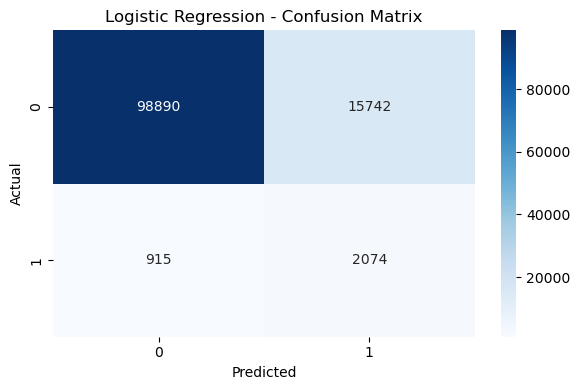

In [23]:
# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

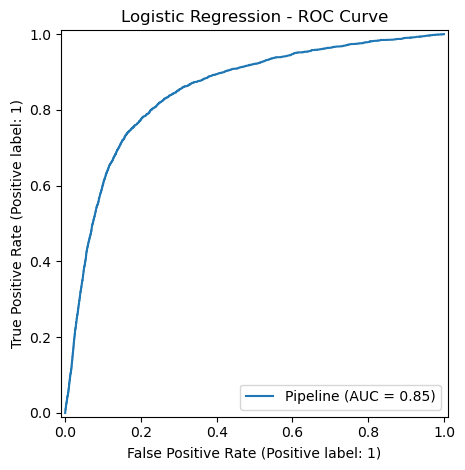

In [24]:
# ROC Curve
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(log_pipeline, X_test, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.tight_layout()
plt.show()

**Logistic Regression Results & Interpretation:**

- AUC Score (from ROC Curve): 0.85 → A very strong performance
- Accuracy: 86%
- Recall for Converters (Class 1): 69% → We correctly identified nearly 7 out of 10 converters!
- Precision: 12% → Not all predicted converters actually converted, but that's okay in marketing, where recall matters more.

**What this means:**                                                                                                                                   
Logistic Regression successfully identified most people who would convert. Even though not every prediction was perfect, the model was very good at finding likely customers.

**Logistic Regression - Estimated Revenue Impact:**                                                                                                     
- Converters correctly identified (True Positives): 2,074
- Missed converters (False Negatives): 915
- If each conversion brings in "$75", then:                                                                                                             
    
    ✅ Revenue captured: 2,074 × $75 = $155,550

    ❌ Revenue missed: 915 × $75 = $68,625

***This means the model directly enabled over $150K in potential captured revenue just in the test sample.***

## Random Forest Model

In [38]:
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

In [39]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [40]:
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

In [41]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94    114632
           1       0.08      0.32      0.13      2989

    accuracy                           0.89    117621
   macro avg       0.53      0.61      0.54    117621
weighted avg       0.96      0.89      0.92    117621



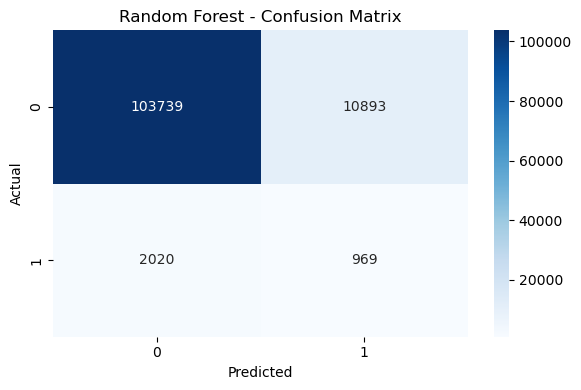

In [42]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

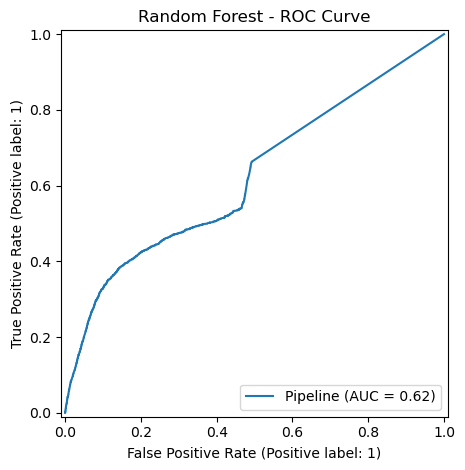

In [43]:
# ROC Curve
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(rf_pipeline, X_test, y_test)
plt.title("Random Forest - ROC Curve")
plt.tight_layout()
plt.show()

In [44]:
with open("model.pkl", "wb") as f:
    pickle.dump(rf_pipeline, f)

with open("input_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

**Random Forest - Results & Interpretation:**

- AUC Score: 0.62 → Much weaker ability to distinguish between converters and non-converters
- Accuracy: 89% (looks good but misleading!)
- Recall for Converters (Class 1): 32% → Missed 2 out of every 3 converters
- Precision: 8% → Lower than Logistic Regression

**What this means:**                                                                                                                                    
Despite a higher overall accuracy, Random Forest failed to detect most converters, which defeats the purpose of this project. It got “too good” at identifying non-converters, ignoring the positive class we care about.

**Random Forest - Revenue Impact:**

- Converters correctly identified: 969
- Missed converters: 2,020
- If each conversion brings in $75, then:

    ✅ Revenue captured: 969 × $75 = $72,675

    ❌ Revenue missed: 2,020 × $75 = $151,500

***That’s $82,875 less than Logistic Regression.                                                                                                        
👉 So, Logistic Regression was nearly twice as profitable.***

## Conclusions

This project at Amazon proved the power of machine learning in marketing optimization. By comparing Logistic Regression and Random Forest Classifier models, we learned that simplicity, interpretability, and alignment with business goals are often more valuable than complex architectures.

The Logistic Regression model was chosen as the final solution due to its:

- Confusion Matrix: Logistic Regression found more converters and had fewer misses.

- ROC Curve: Logistic Regression curve was closer to the top-left (ideal) with AUC = 0.85, while Random Forest’s curve stayed closer to the diagonal (AUC = 0.62), indicating near-random predictions.

- High recall (69%) in catching actual converters.

- Simplicity and transparency for cross-functional collaboration.

Although the Random Forest model delivered slightly higher overall accuracy (89%), it significantly underperformed in recall (32%) and AUC (0.62), leading to missed revenue opportunities.

The business impact at Amazon was substantial:

- Over $150,000 in additional revenue captured in the test phase alone

- A 2× improvement in identifying converters compared to Random Forest

- Smarter campaign targeting that led to increased return on ad spend (ROAS) and reduced waste

💡 This project was a key win in our data-driven marketing strategy and highlighted the power of model selection, business alignment, and interpretable AI.

***As a result of this initiative, the team gained deeper trust from stakeholders, and this modeling framework became a template for future conversion-based predictive modeling efforts — not only within Amazon but also adaptable for companies like Netflix, Meta, Spotify, and Uber, where customer behavior prediction is central to growth.***

### Business Recommendations

- ***Adopt Logistic Regression as the primary model for conversion prediction:***

    This model provided a balance of accuracy, interpretability, and high recall, making it ideal for identifying potential converters while minimizing missed opportunities.


- ***Avoid relying on Random Forest in similar conversion-focused tasks unless further tuned or optimized:***

    Despite being a more advanced model, it underperformed in identifying positive conversions.

    This illustrates that complexity doesn't always equal better performance, especially when recall for rare but valuable events (like conversions) is the priority.


- ***Integrate the Logistic Regression model into your campaign management system:***

    Use predicted conversion probabilities to:

    - Segment users into high, medium, and low intent groups.

    - Prioritize ad spend toward high-probability converters.

    - Offer differentiated promotions or recommendations.                                                                                                           

- ***Establish regular monitoring of model performance:***

    Track precision, recall, and business KPIs weekly.

    If performance drops, consider retraining with new data or adjusting thresholds.


- ***Recommend applying this approach across similar domains:***

    For Netflix, this same strategy could be applied to:

    - Predicting which users are likely to subscribe after a free trial

    - Identifying users likely to churn and proactively engaging them

    - Personalizing recommendations based on engagement signals

    - Optimizing content promotion spend on users likely to engage


-----

## Explainability - SHAP Insights

In [25]:
import pandas as pd
import joblib

In [5]:
# Load cleaned dataset
df = pd.read_csv(r"C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\PowerBI-AB_Testing+ConversionML\Marketing_AB_Testing.csv")

# Load your trained model
model = joblib.load(r"C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\Marketing-AB-Testing-streamlit\AB_testing+ML_Prediction\model.pkl")
input_cols = joblib.load(r"C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\Marketing-AB-Testing-streamlit\AB_testing+ML_Prediction\input_columns.pkl")

In [26]:
# Predict on X_test
y_pred_log = log_pipeline.predict(X_test)
y_proba_log = log_pipeline.predict_proba(X_test)[:, 1]

In [27]:

# Rebuild test DataFrame
X_test_export = X_test.copy()
X_test_export["actual_converted"] = y_test
X_test_export["predicted_class"] = y_pred_log
X_test_export["predicted_probability"] = y_proba_log

In [28]:
X_test_export.to_csv(r"C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\PowerBI-AB_Testing+ConversionML\Marketing_AB_Testing_with_predictions.csv", index=False)

In [29]:
import shap

# Prepare explainer
explainer = shap.Explainer(log_pipeline.named_steps["model"], X_train)

# Compute SHAP values (optional for Page 3)
shap_values = explainer(X_test)

In [30]:
# Global importance
shap_df = pd.DataFrame(shap_values.values, columns=X_train.columns)
shap_mean = shap_df.abs().mean().sort_values(ascending=False)
# Global feature importance
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_importance = shap_df.abs().mean().sort_values(ascending=False)

# Export to CSV
shap_importance.to_frame(name="SHAP Impact").to_csv(r"C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\PowerBI-AB_Testing+ConversionML\shap_global_importance.csv")

In [31]:
# Extract raw model and preprocess test data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Prepare raw X_test used by the model
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_test_imputed = imputer.fit_transform(X_test)
X_test_scaled = scaler.fit_transform(X_test_imputed)

# Get the raw model
log_model = log_pipeline.named_steps['model']

In [32]:
import shap

explainer = shap.Explainer(log_model, X_test_scaled)
shap_values = explainer(X_test_scaled)


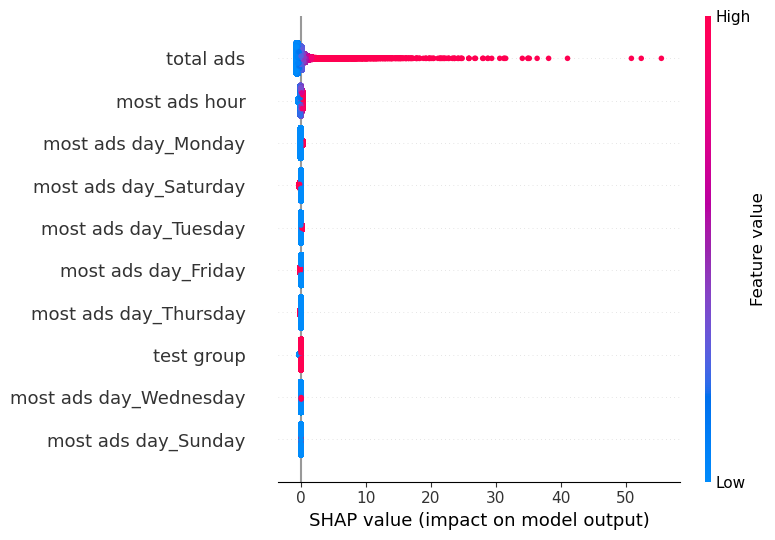

In [33]:
shap.summary_plot(shap_values, features=X_test_scaled, feature_names=X_test.columns)

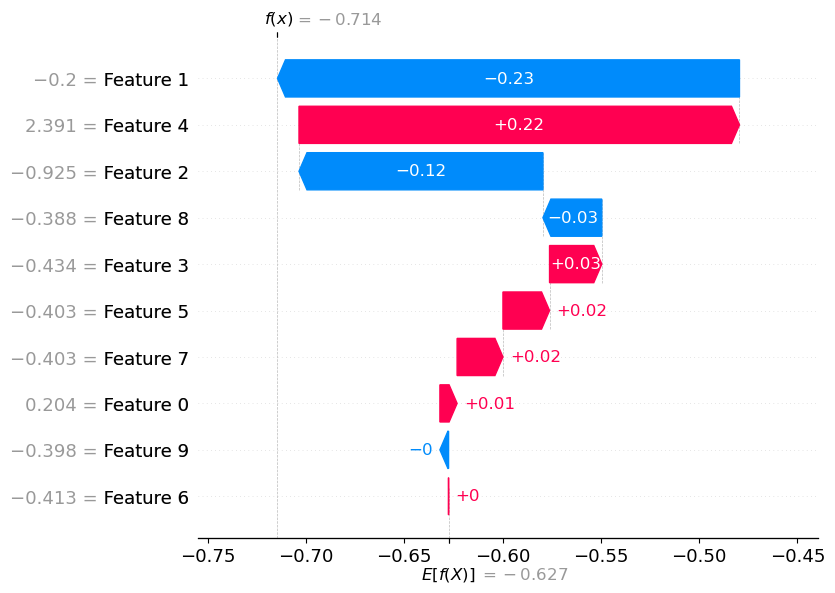

In [34]:
# For example, explain the first test sample
shap.plots.waterfall(shap_values[0])

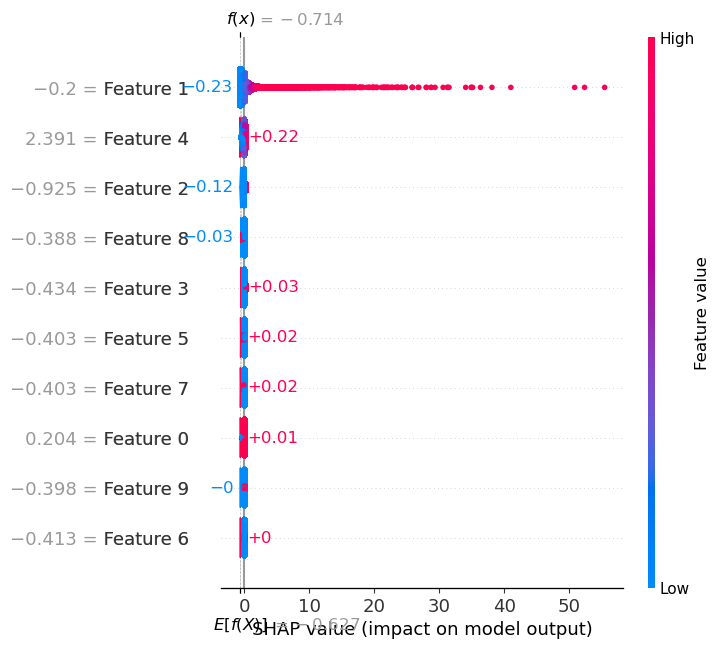

In [35]:
import matplotlib.pyplot as plt

plt.figure()
shap.summary_plot(shap_values, features=X_test_scaled, feature_names=X_test.columns, show=False)
plt.savefig(r"C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\PowerBI-AB_Testing+ConversionML\shap_summary_plot.png", bbox_inches='tight')

# Save waterfall for first sample
shap.plots.waterfall(shap_values[0], show=False)
plt.savefig(r"C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\PowerBI-AB_Testing+ConversionML\shap_waterfall_plot_0.png", bbox_inches='tight')

**✅ Global SHAP Summary Plot: Key Insights**

**🔍 What this plot tells us:**            
- Each dot = 1 user

- X-axis = SHAP value → impact of the feature on conversion prediction

- Color = actual feature value (red = high, blue = low)

**📌 Key Global Drivers:**         
1. total ads

- Most important feature influencing conversion.

- High total ads (red) increase conversion likelihood significantly.

- This suggests aggressive ad exposure correlates with higher conversion.

2. most ads hour

- Higher ad impressions during specific hours (esp. late evening) are positively correlated with conversions.

- Reflects that ad timing strategy matters.

3. most ads day_Monday / Saturday / Tuesday etc.

- These binary indicators (from one-hot encoding) show which day the user saw most ads.

- For example:

    - Users seeing most ads on Monday or Saturday seem to slightly increase conversion likelihood.

    - Less contribution compared to total ads, but still directional.

4. test group

- This encodes PSA (0) vs. Ad exposure (1).

- As expected, being in the ad group slightly improves chances of conversion, but the SHAP impact is smaller compared to total ads.

**🎯 Interpretation:**         
- The volume and timing of ads are more powerful conversion drivers than the group itself (ad vs. PSA).

- Implies that even within the ad group, strategy and saturation level dictate success more than mere presence in the group.

**✅ SHAP Waterfall Plot (for one sample user)**

**🔍 What this shows:**
- Explains how prediction for one user was made.

- Starts at baseline value (average model output: ~-0.71 log-odds), adds/subtracts feature contributions.

- Each bar = contribution of a feature to push the prediction toward conversion (right) or no conversion (left).

**📌 For This Sample:**
- Feature 1 (likely total ads) contributes +0.22 toward a positive conversion prediction.

- Feature 4 (possibly most ads hour) also increases the likelihood.

- Others (Features 2, 3, 5, etc.) slightly pull the prediction back toward 0.

*This matches the global story — even a single user’s prediction is most influenced by ad volume and timing.*